In [1]:
import numpy as np
import random 
from random import sample
import matplotlib.pyplot as plt

In [2]:
class Genetics:
    
    def __init__(self, individuals):
        self.indiv = individuals

        
#Function to calculate fitness of population using objective function formula
    def calcFitness(self):
        
        fitCalc = []

        for i, value in enumerate(self.indiv):
            total = 0
            for j in value:
                total = total + j
            avg = total / len(value)
            fitCalc.append(avg)

        return fitCalc

#Roulette Wheel Selection process among Chromosome
    def selection(self, genome_fit):
        global firstInd, secInd, lastInd
        
        pop_fitness = 0
        for value in genome_fit:
            pop_fitness = pop_fitness + value
        
        genome_probabilities = []
        for val in genome_fit:
            totalProb = val / pop_fitness
            genome_probabilities.append(totalProb)
        
        selected_list = random.sample(genome_probabilities, 2)
        least = min(genome_probabilities)
        
        for j, ele in enumerate(genome_probabilities):
            if ele == selected_list[0]:
                firstInd = j
            elif ele == selected_list[1]:
                secInd = j
            elif ele == least:
                lastInd = j
                
        return firstInd, secInd, lastInd
   
            
#Crossover process between two randomly selected chromosome
    def crossover(self, idx_parent1, idx_parent2):
    
        bin_parent1 = self.indiv[idx_parent1]
        bin_parent2 = self.indiv[idx_parent2]
        offSpring = []
            
        for i in range(len(bin_parent1)):
            if bin_parent1[i] > bin_parent2[i]:
                cross = bin_parent1[i]
            else:
                cross = bin_parent2[i]
            offSpring.append(cross)
        
        return offSpring

    
#Mutation process using swap method on the new offspring 
    def mutation(self, newSpring):
    
        sprt = list(newSpring)
        
        def createList(r1, r2):
            return [item for item in range(r1, r2+1)]
        
        list_rand = createList(0, 7)
        position = sample(list_rand, 2)
        
        hold = sprt[position[0]]
        sprt[position[0]] = sprt[position[1]]
        sprt[position[1]] = hold
        
        return sprt
    
    
#Replace the least fit chromosome with the new offspring
    def fittestOffspring(self, fitParent, leastIdx):
        
        fit1 = list(fitParent)
        
        self.indiv[leastIdx] = fit1
            

In [3]:
class Population:
    
    def __init__(self, popSize):
        self.popSize = popSize
        
    def initializePopulation(self):
        individuals = []
        
        for i, value in enumerate(range(self.popSize)):
            individuals.append([])
            for j in range(8):
                val = random.uniform(0,1)
                individuals[i].append(val)
        
        for j, ele in enumerate(individuals):
            ele = list(map(float, ele))  

        return individuals 


In [4]:
def main():
    generationCount = 0 #No of iteration
    crossProb = 0.65    #Probability of crossover
    mutateProb = 0.75   #Probability of mutation
    
    p1 = Population(30) #Assigned object for class Population with population size = 80
    x_value = p1.initializePopulation()
    
    g1 = Genetics(x_value)
    fitness_Calc = g1.calcFitness()

    fittest = max(fitness_Calc)
        
    print("Generation: ", generationCount, "Fittest Value: ", fittest)
    
    while generationCount < 100:
        generationCount = generationCount + 1
        
        #Do Selection
        firstIdx, secIdx, leastIdx = g1.selection(fitness_Calc)
        
        #Do Crossover and Mutation if either probability rates satisfied
        if(random.uniform(0,1) <= crossProb or random.uniform(0,1) <= mutateProb):
            cross_result = g1.crossover(firstIdx, secIdx)
            mutate_result = g1.mutation(cross_result)
            g1.fittestOffspring(mutate_result, leastIdx)

        #Calculate new fitness value
        fit_Array = g1.calcFitness()
        fittest = max(fit_Array)
        
        print("Generation: ", generationCount, "Fittest Value: ", fittest)
        
main()

Generation:  0 Fittest Value:  0.6512324233744688
Generation:  1 Fittest Value:  0.6512324233744688
Generation:  2 Fittest Value:  0.6512324233744688
Generation:  3 Fittest Value:  0.6512324233744688
Generation:  4 Fittest Value:  0.6512324233744688
Generation:  5 Fittest Value:  0.6512324233744688
Generation:  6 Fittest Value:  0.784605760030217
Generation:  7 Fittest Value:  0.6512324233744688
Generation:  8 Fittest Value:  0.6512324233744688
Generation:  9 Fittest Value:  0.6512324233744688
Generation:  10 Fittest Value:  0.6512324233744688
Generation:  11 Fittest Value:  0.6512324233744688
Generation:  12 Fittest Value:  0.6738674041533743
Generation:  13 Fittest Value:  0.6512324233744688
Generation:  14 Fittest Value:  0.6512324233744688
Generation:  15 Fittest Value:  0.6512324233744688
Generation:  16 Fittest Value:  0.7294637855984126
Generation:  17 Fittest Value:  0.7678115878696751
Generation:  18 Fittest Value:  0.7714922610534389
Generation:  19 Fittest Value:  0.65123242

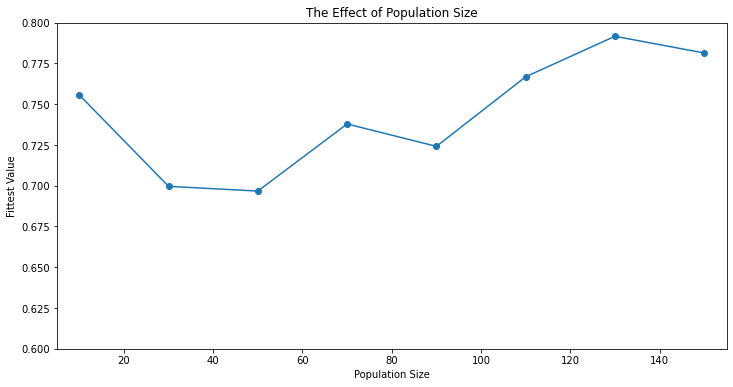

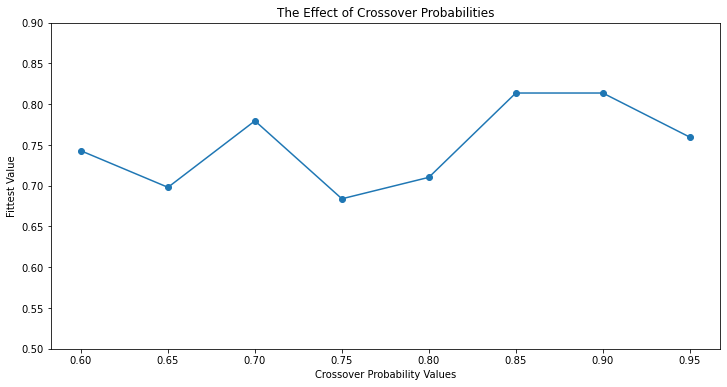

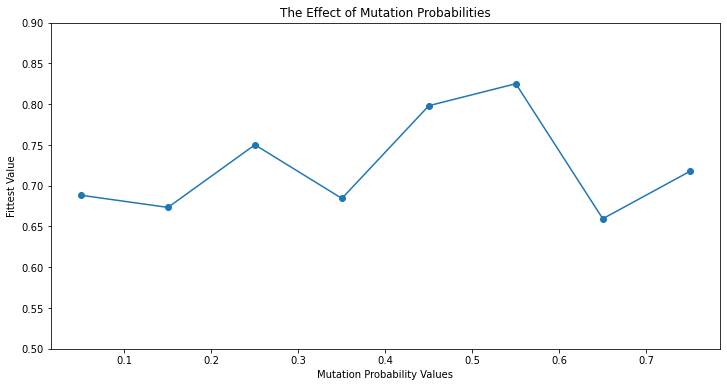

In [5]:
popList = [10, 30, 50, 70, 90, 110, 130, 150]

fitList = [0.7556818461525836, 0.6996334555956842, 0.6967241118465091, 0.7378603803507097, 0.7241342718576613, 0.7667984554634729, 0.791637923299483, 0.7813762191603839]

plt.figure(figsize=(12,6))
plt.plot(popList, fitList, marker="o")
plt.xlabel("Population Size")
plt.ylabel("Fittest Value")
plt.ylim([0.6, 0.8])
plt.xlim([5, 155])
plt.title("The Effect of Population Size")
plt.show()

cp = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
fitval= [0.7428124296431089, 0.6980250512522477, 0.7795449977643089, 0.6839635037309, 0.710286032111721, 0.8136884436534008, 0.8136884436534008, 0.7596192229373241]

plt.figure(figsize=(12,6))
plt.plot(cp, fitval, marker="o")
plt.xlabel("Crossover Probability Values")
plt.ylabel("Fittest Value")
plt.ylim([0.5, 0.9])
plt.title("The Effect of Crossover Probabilities")
plt.show()

mp = [0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75]
fit = [0.6883226628304052, 0.6734011169371164, 0.7501801883721789, 0.6843954744690521, 0.7981394719436328,  0.8251119260271939, 0.6595080961105075, 0.7175237947264992]

plt.figure(figsize=(12,6))
plt.plot(mp, fit, marker="o")
plt.xlabel("Mutation Probability Values")
plt.ylabel("Fittest Value")
plt.ylim([0.5, 0.9])
plt.title("The Effect of Mutation Probabilities")
plt.show()